## 문제
케빈 베이컨의 6단계 법칙에 의하면 지구에 있는 모든 사람들은 최대 6단계 이내에서 서로 아는 사람으로 연결될 수 있다. 케빈 베이컨 게임은 임의의 두 사람이 최소 몇 단계 만에 이어질 수 있는지 계산하는 게임이다.

예를 들면, 전혀 상관없을 것 같은 인하대학교의 이강호와 서강대학교의 민세희는 몇 단계만에 이어질 수 있을까?

천민호는 이강호와 같은 학교에 다니는 사이이다. 천민호와 최백준은 Baekjoon Online Judge를 통해 알게 되었다. 최백준과 김선영은 같이 Startlink를 창업했다. 김선영과 김도현은 같은 학교 동아리 소속이다. 김도현과 민세희는 같은 학교에 다니는 사이로 서로 알고 있다. 즉, 이강호-천민호-최백준-김선영-김도현-민세희 와 같이 5단계만 거치면 된다.

케빈 베이컨은 미국 헐리우드 영화배우들 끼리 케빈 베이컨 게임을 했을때 나오는 단계의 총 합이 가장 적은 사람이라고 한다.

오늘은 Baekjoon Online Judge의 유저 중에서 케빈 베이컨의 수가 가장 작은 사람을 찾으려고 한다. 케빈 베이컨 수는 모든 사람과 케빈 베이컨 게임을 했을 때, 나오는 단계의 합이다.

예를 들어, BOJ의 유저가 5명이고, 1과 3, 1과 4, 2와 3, 3과 4, 4와 5가 친구인 경우를 생각해보자.

1은 2까지 3을 통해 2단계 만에, 3까지 1단계, 4까지 1단계, 5까지 4를 통해서 2단계 만에 알 수 있다. 따라서, 케빈 베이컨의 수는 2+1+1+2 = 6이다.

2는 1까지 3을 통해서 2단계 만에, 3까지 1단계 만에, 4까지 3을 통해서 2단계 만에, 5까지 3과 4를 통해서 3단계 만에 알 수 있다. 따라서, 케빈 베이컨의 수는 2+1+2+3 = 8이다.

3은 1까지 1단계, 2까지 1단계, 4까지 1단계, 5까지 4를 통해 2단계 만에 알 수 있다. 따라서, 케빈 베이컨의 수는 1+1+1+2 = 5이다.

4는 1까지 1단계, 2까지 3을 통해 2단계, 3까지 1단계, 5까지 1단계 만에 알 수 있다. 4의 케빈 베이컨의 수는 1+2+1+1 = 5가 된다.

마지막으로 5는 1까지 4를 통해 2단계, 2까지 4와 3을 통해 3단계, 3까지 4를 통해 2단계, 4까지 1단계 만에 알 수 있다. 5의 케빈 베이컨의 수는 2+3+2+1 = 8이다.

5명의 유저 중에서 케빈 베이컨의 수가 가장 작은 사람은 3과 4이다.

BOJ 유저의 수와 친구 관계가 입력으로 주어졌을 때, 케빈 베이컨의 수가 가장 작은 사람을 구하는 프로그램을 작성하시오.

### 입력
첫째 줄에 유저의 수 N (2 ≤ N ≤ 100)과 친구 관계의 수 M (1 ≤ M ≤ 5,000)이 주어진다. 둘째 줄부터 M개의 줄에는 친구 관계가 주어진다. 친구 관계는 A와 B로 이루어져 있으며, A와 B가 친구라는 뜻이다. A와 B가 친구이면, B와 A도 친구이며, A와 B가 같은 경우는 없다. 친구 관계는 중복되어 들어올 수도 있으며, 친구가 한 명도 없는 사람은 없다. 또, 모든 사람은 친구 관계로 연결되어져 있다. 사람의 번호는 1부터 N까지이며, 두 사람이 같은 번호를 갖는 경우는 없다.

### 출력
첫째 줄에 BOJ의 유저 중에서 케빈 베이컨의 수가 가장 작은 사람을 출력한다. 그런 사람이 여러 명일 경우에는 번호가 가장 작은 사람을 출력한다.

### 예제 입력 1 
5 5
1 3
1 4
4 5
4 3
3 2

### 예제 출력 1 
3

#### 풀이
- 그래프 이론
- 그래프 탐색
- 너비 우선 탐색 (BFS)
- 플로이드–워셜

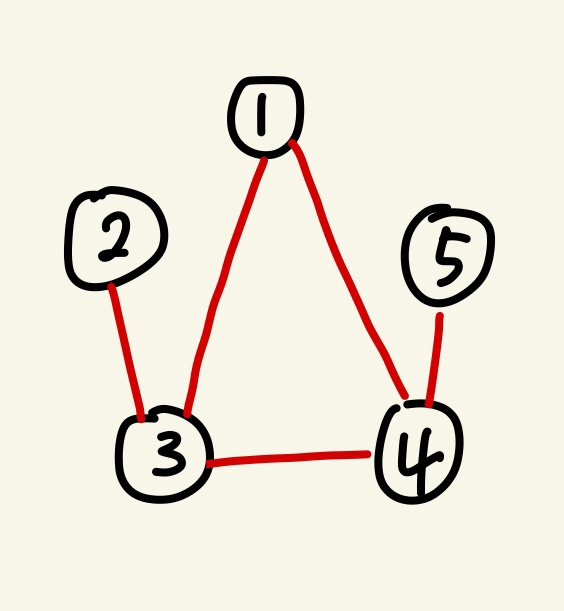

[풀이방법]


In [1]:
# import sys
from collections import deque
# input = sys.stdin.readline

n,m = map(int,input().split())
graph = [[] for _ in range(n+1)]

# 어떤 노드들이 연결되어 있는지 graph라는 2차원 배열에 저장
for i in range(m):
    a,b = map(int,input().split())
    graph[a].append(b)
    graph[b].append(a)

def bfs(graph,start):
    num = [0] * (n+1) # 연결 갯수를 담을 변수
    q = deque() # 덱 사용
    visited[start] = 1 # 탐색 시작
    q.append(start)
    while q:
        a = q.popleft() # 순서대로 나온 값 변수에 담기
        for i in graph[a]:
            if visited[i] == 0: # 아직 탐색하지 않은 사람
                num[i] = num[a]+1
                q.append(i)
                visited[i] = 1 # 방문 표시 해주기
    return sum(num)

result = [] # 각 유저별 베이컨 수 받을 변수
for i in range(1,n+1):
    visited = [0 for _ in range(n+1)]
    result.append(bfs(graph,i))
print(result.index(min(result))+1) # 베이컨 수 중 가장 작은 값

5 5
1 3
1 4
4 5
4 3
3 2
3
